In [1]:
# !pip install -q -U transformers==4.37.2
# !pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

In [2]:
# !python -V

Python 3.10.12


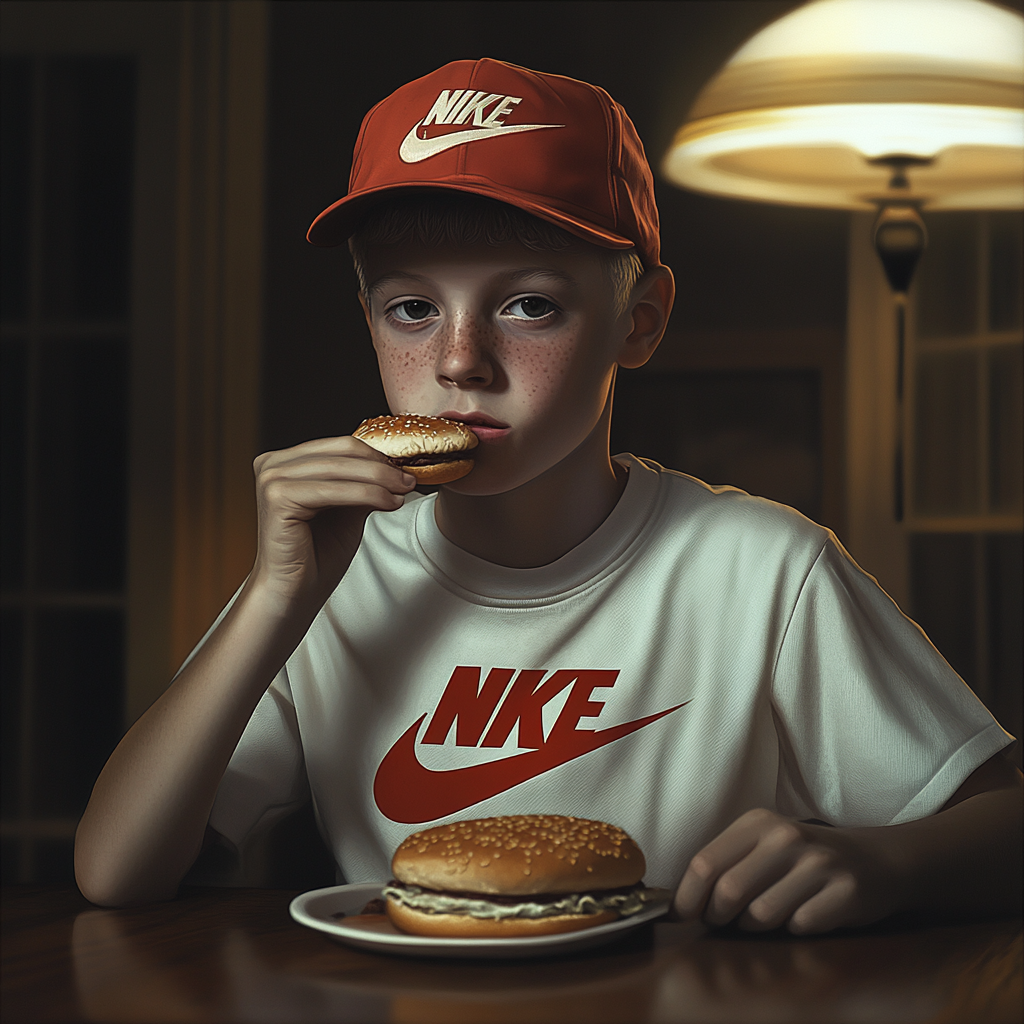

In [7]:
from PIL import Image

def split_image(image_path, rows, cols):
    # Load the image
    image = Image.open(image_path)
    # Calculate the dimensions for each sub-image
    width, height = image.size
    sub_width = width // cols
    sub_height = height // rows

    images = []
    # Split the image into sub-images
    for i in range(rows):
        for j in range(cols):
            # Define the box to crop
            box = (j * sub_width, i * sub_height, (j + 1) * sub_width, (i + 1) * sub_height)
            sub_image = image.crop(box)
            images.append(sub_image)
    
    return images

# Path to your gridded image
# image_path = '/work/pi_ahoumansadr_umass_edu/sd_finetune/diffusers/examples/text_to_image/(Evaluation) einstein writing/evaluation_trigger2/(mj_config_2) Einstein discussing theories over coffee..jpg'
image_path = 'example_nike.png'
image = Image.open(image_path)
# Split the image into a 5x5 grid
# sub_images = split_image(image_path, 4, 5)
# image = sub_images[0]


image

In [8]:
import torch

torch.cuda.is_available()

True

In [9]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [10]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", 
                model=model_id, 
                model_kwargs={"quantization_config": quantization_config})

Loading checkpoint shards: 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [15]:
from transformers import BitsAndBytesConfig
import torch
from PIL import Image
import requests

max_new_tokens = 200
prompt = "USER: <image>\nDo you see nike on the shirt? Answer in Yes or No\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [16]:
print(outputs[0]["generated_text"])

USER:  
Do you see nike on the shirt? Answer in Yes or No
ASSISTANT: Yes
